In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import sin,cos,tan,arcsin,arccos,arctan,arctan2,sqrt,pi
%matplotlib inline

def dh(a,alpha,d,theta):
    M = np.array([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return M

# Cinemática inversa de un manipulador RR de 2 GDL

De la cinemática directa del manipulador RR sabemos que:

$$ x = l_2 \cos(\theta_1 + \theta_2) + l_1 \cos\theta_1 $$
$$ y = l_2 \sin(\theta_1 + \theta_2) + l_1 \sin\theta_1 $$

Elevando al cuadrado cada miembro de las ecuaciones anteriores y sumándolas, se tiene:

$$ x^2 + y^2 = \left( l_2 \cos(\theta_1 + \theta_2) + l_1 \cos\theta_1 \right)^2 + 
\left( l_2 \sin(\theta_1 + \theta_2) + l_1 \sin\theta_1 \right)^2 $$

Simplificando términos:

$$ x^2 + y^2 = l_1^2 + l_2^2 + 2 l_1 l_2 \cos\theta_2 $$

$$ \cos\theta_2 = \frac{x^2 + y^2 - l_1^2 - l_2^2  }{2 l_1 l_2} = K $$

Además, sabemos que: 

$$ u = \arctan\left(\frac{\sin u}{\cos u}\right) \qquad y \qquad \sin u = \pm \sqrt{1-\cos^2 u} $$

De tal manera que podemos escribir $\theta_2$ en términos de la función arcotangente, como sigue:

$$ \theta_2 = \arctan\left(\frac{\pm\sqrt{1-K^2}}{K}\right) $$

Para calcular $\theta_1$, de las ecuaciones para $x$ e $y$ podemos expresar el cociente $y/x$ y trabajar con la expresión resultante:

$$ \frac{y}{x} = \frac{l_2 \sin(\theta_1 + \theta_2) + l_1 \sin\theta_1 }{ l_2 \cos(\theta_1 + \theta_2) + l_1 \cos\theta_1 } $$

Factorizando y simplificando los términos para $\cos\theta_1$ y $\sin\theta_1$, podemos escribir:

$$ \theta_1 = \arctan\left( \frac{l_2 y \cos\theta_2 + l_1 y - l_2 x \sin\theta_2}{l_2 x \cos\theta_2 + l_1 x + l_2 y \sin\theta_2} \right) $$

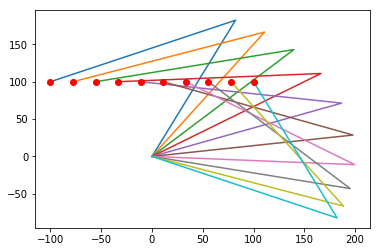

In [6]:
l1,l2 = 200,200
py = 100
for px in np.linspace(-100,100,10):
    K = (px**2 + py**2 - l1**2 - l2**2)/(2*l1*l2)
    t2 = np.arctan2(sqrt(1-K**2), K)
    t1 = np.arctan2(l2*py*cos(t2) + l1*py - l2*px*sin(t2), l2*px*cos(t2) + l1*px + l2*py*sin(t2))

    T1_0 = dh(l1,0,0,t1)
    T2_1 = dh(l2,0,0,t2)
    T2_0 = np.dot(T1_0, T2_1)

    A = np.array([0,0,0])
    B = T1_0[:3,3]
    C = T2_0[:3,3]
    plt.plot([A[0],B[0],C[0]],[A[1],B[1],C[1]])
    plt.plot(C[0],C[1], "ro")

In [11]:
B[2]

0.0

## Círculo

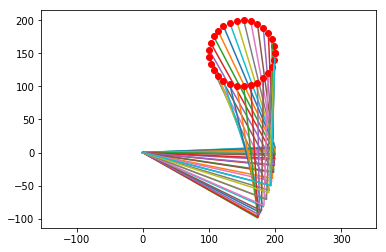

In [48]:
l1,l2 = 200,200
for t in np.linspace(0,2*pi,30):
    px = 150 + 50*np.cos(t)
    py = 150 + 50*np.sin(t)
    K = (px**2 + py**2 - l1**2 - l2**2)/(2*l1*l2)
    t2 = np.arctan2(sqrt(1-K**2), K)
    t1 = np.arctan2(l2*py*cos(t2) + l1*py - l2*px*sin(t2), l2*px*cos(t2) + l1*px + l2*py*sin(t2))

    T1_0 = dh(l1,0,0,t1)
    T2_1 = dh(l2,0,0,t2)
    T2_0 = np.dot(T1_0, T2_1)

    A = np.array([0,0])
    B = T1_0[:2,3]
    C = T2_0[:2,3]
    plt.plot([A[0],B[0],C[0]],[A[1],B[1],C[1]])
    plt.plot(C[0],C[1], "ro")
    plt.axis('equal')

## Lista de puntos

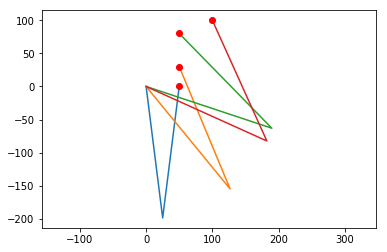

In [52]:
l1,l2 = 200,200
puntos = [(50,0),
          (50,30),
          (50,80),
          (100,100)]

for px,py in puntos:
    K = (px**2 + py**2 - l1**2 - l2**2)/(2*l1*l2)
    t2 = np.arctan2(sqrt(1-K**2), K)
    t1 = np.arctan2(l2*py*cos(t2) + l1*py - l2*px*sin(t2), l2*px*cos(t2) + l1*px + l2*py*sin(t2))

    T1_0 = dh(l1,0,0,t1)
    T2_1 = dh(l2,0,0,t2)
    T2_0 = np.dot(T1_0, T2_1)

    A = np.array([0,0])
    B = T1_0[:2,3]
    C = T2_0[:2,3]
    plt.plot([A[0],B[0],C[0]],[A[1],B[1],C[1]])
    plt.plot(C[0],C[1], "ro")
    plt.axis('equal')

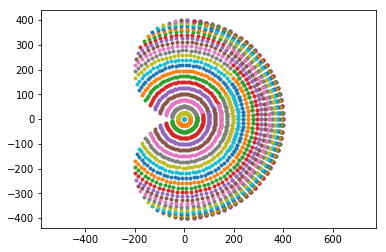

In [56]:
l1,l2 = 200,200

for t1 in np.linspace(-pi/2,pi/2):
    for t2 in np.linspace(-pi,pi):
        T1_0 = dh(l1,0,0,t1)
        T2_1 = dh(l2,0,0,t2)
        T2_0 = np.dot(T1_0, T2_1)

        A = np.array([0,0])
        B = T1_0[:2,3]
        C = T2_0[:2,3]
        #plt.plot([A[0],B[0],C[0]],[A[1],B[1],C[1]])
        plt.plot(C[0],C[1], ".")
        plt.axis('equal')